# IDEAS
# Total Time Played
# Most Played Artist
# Most Played Songs
# Day of the Year that was most active
# Recommend 1 song that has more than X plays, but wasn't played since ..

# Deeper Stuff
# --> Finding Connections between artists
# --> Have a model find a new song for me 
# How did my listening habit change in a year? i.e. compare first data set with second 
# Use Spotify API to query top artists and build a random playlist out of it


In [1]:
import pandas as pd

In [2]:
# Read data from files
temp = []
for i in range(0,4):
    df = pd.read_json(f'StreamingHistory{i}.json',date_unit = "ms", convert_axes=True)
    temp.append(df)


FileNotFoundError: File StreamingHistory0.json does not exist

In [ ]:
data = pd.concat(temp)

In [ ]:
data

,endTime,artistName,trackName,msPlayed
0,2018-10-12 14:47,Corey Layzell,Oxygen,190276
1,2018-10-12 14:48,Jacob Lee,Black Sheep,84898
2,2018-10-12 14:51,THE DLX,Idk,191829
3,2018-10-12 14:52,Streex,You Mean the World to Me (feat. Nick Thompson),25834
4,2018-10-12 15:03,Secret Nation,Home,62855
...,...,...,...,...
9995,2019-09-15 06:38,Winona Oak,Break My Broken Heart,214715
9996,2019-09-15 06:42,Of Monsters and Men,Wild Roses,242760
9997,2019-09-15 06:43,OVERSTREET,On The Way,23806
9998,2019-09-15 06:45,Death Cab for Cutie,To The Ground,138480


Let's skim trough the data

In [5]:
data.sort_values(by=["msPlayed"])

,endTime,artistName,trackName,msPlayed
9329,2019-04-10 16:25,Arash,She Makes Me Go (feat. Sean Paul) - Radio Edit,0
1701,2019-02-15 06:11,Cam Meekins,Better Days,0
4687,2018-12-19 22:58,AnnenMayKantereit,Freitagabend,0
4689,2018-12-19 22:58,AnnenMayKantereit,Du bist anders,0
4691,2018-12-19 22:58,AnnenMayKantereit,In meinem Bett,0
...,...,...,...,...
8834,2019-01-27 20:15,Wrabel,11 blocks (live),640744
9234,2019-04-10 09:32,Front Porch Step,I Won't Say That I'm Okay,643609
1155,2018-11-22 07:11,Forest Blakk,Swipe Right,722912
6477,2019-03-23 23:45,SWR1 Leute in Baden-Württemberg,"Sarah Henke, Deutsch-koreanische Sterneköchin ...",1792507


Interesting, looks like we have podcasts and songs that had 0 playtime in there

SWR1 Leute in Baden-Württemberg	Sarah Henk

EUphoria Podcast	

In [6]:
# Let's see how much 0 data we have

In [7]:
data.query("msPlayed == 0")

,endTime,artistName,trackName,msPlayed
55,2018-10-28 19:54,Madsen,Mein erstes Lied,0
75,2018-10-28 21:59,Madeline Juno,Schatten ohne Licht - Piano Version,0
127,2018-11-06 16:44,Thirty Seconds To Mars,Closer To The Edge,0
163,2018-11-08 07:51,This Wild Life,College Kids,0
165,2018-11-08 07:51,This Wild Life,Westside,0
...,...,...,...,...
9501,2019-09-11 04:57,Witt Lowry,Oxygin,0
9525,2019-09-11 05:40,Jake Miller,Lion Heart,0
9532,2019-09-11 05:40,Imagine Dragons,On Top Of The World,0
9582,2019-09-11 09:26,Quinn XCII,Stacy - Acoustic,0


In [8]:
# 746 is quite a lot of song starts honestly LOL

Also what is that??

	2019-09-11 04:57

That is not a time I'm awake. Usually

Seems weird, but we can't really find out more here. No timezones~

In [9]:
# Alright, since we have all song starts in here, let's take the avg. time it takes me to skip a song into account

In [10]:
# I'd guess it is usually less than 5 seconds

In [11]:
data.query("msPlayed < 5000")

,endTime,artistName,trackName,msPlayed
5,2018-10-15 14:48,Secret Nation,Home,3102
35,2018-10-23 17:25,wolfi,invincible,3295
37,2018-10-23 17:28,Mayday Parade,"Oh Well, Oh Well - Acoustic",4851
38,2018-10-23 17:28,Mayday Parade,When You See My Friends - Acoustic,3394
43,2018-10-23 17:36,Dylan Owen,Mourn,3655
...,...,...,...,...
9862,2019-09-13 13:53,The Thoughtlife,You'll Never Know,432
9880,2019-09-13 18:25,Dylan Owen,Garden of the Ashes,800
9881,2019-09-13 18:25,Dylan Owen,Creases,1940
9882,2019-09-13 18:35,Dylan Owen,Neighborhood Saints,4658


In [12]:
# 6751  data points that we don't count as actual listens 

In [13]:
# Ideally we would like to check if a song was acutally finshed by comparing it to the song length - or we take the average

In [14]:
# Speaking of averages, let's have a look at the msListend distribution

In [15]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E4AC49E08>]],
      dtype=object)

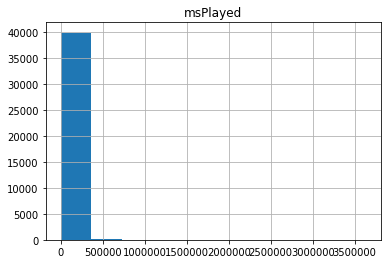

In [16]:
data.hist()

In [17]:
# Mhh, looks pretty bad lol --> guess we have to get rid of our outliners beforehand

In [18]:
cleaned = data.query("msPlayed > 5000 & msPlayed < 360000")

In [19]:
# Actually, mS are pretty weird to analyze, let's transfrom them to seconds

In [20]:
cleaned = cleaned.msPlayed.divide(1000)

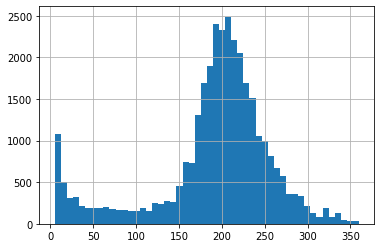

In [21]:
cleaned.hist(bins=50)

In [22]:
# Let's put the minimum outliers back into the picture

In [23]:
cleaned2 = data.query("msPlayed < 360000")

In [24]:
cleaned2 = cleaned2.msPlayed.divide(1000)

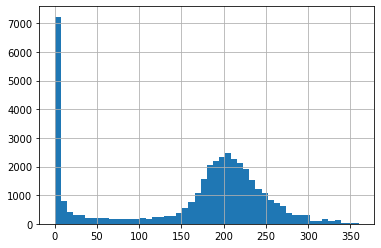

In [25]:
cleaned2.hist(bins=50)

In [26]:
# Alright, looks like our iniial guess of 5 seconds was pretty good

In [27]:
# We can still see that most of the data is between 150 and 350 Seconds

In [28]:
# Playing around with different plots:

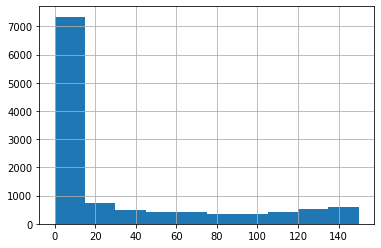

In [29]:
data.query("msPlayed > 0 & msPlayed < 150000").msPlayed.divide(1000).hist()

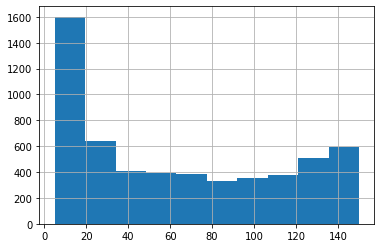

In [30]:
data.query("msPlayed > 5000 & msPlayed < 150000").msPlayed.divide(1000).hist()

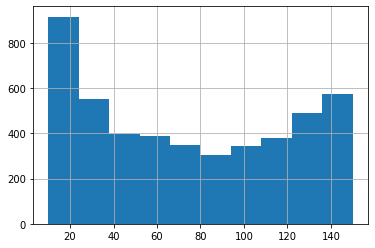

In [31]:
data.query("msPlayed > 10000 & msPlayed < 150000").msPlayed.divide(1000).hist()

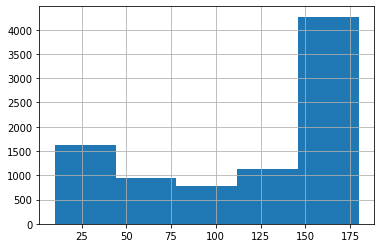

In [32]:
data.query("msPlayed > 10000 & msPlayed < 180000").msPlayed.divide(1000).hist(bins=5)

In [33]:
# How many songs are actually past x minutes playtime?

In [34]:
data.query("artistName == 'Foals'")

,endTime,artistName,trackName,msPlayed
3672,2018-12-11 15:10,Foals,Spanish Sahara,677
5094,2018-12-22 12:56,Foals,Spanish Sahara,1210
6648,2019-01-10 17:10,Foals,Spanish Sahara,3826
9047,2019-01-29 07:42,Foals,Spanish Sahara,91122
9148,2019-01-29 17:25,Foals,Spanish Sahara,111
5613,2019-03-15 13:58,Foals,Spanish Sahara,409560
6600,2019-03-25 07:03,Foals,Spanish Sahara,215
8429,2019-04-03 16:18,Foals,Spanish Sahara,62021
1650,2019-04-26 15:45,Foals,Spanish Sahara,409560
7241,2019-08-22 15:38,Foals,Spanish Sahara,409560


In [35]:
data.query("msPlayed > 450000").sort_values(by="msPlayed")

,endTime,artistName,trackName,msPlayed
8328,2019-09-01 20:06,Witt Lowry,Nevers Road,454662
9260,2019-06-19 16:32,Green Day,Extraordinary Girl / Letterbomb,460000
195,2019-04-17 06:08,Bleachers,Goodmorning,462062
7632,2019-08-25 13:32,Fracture Design,A Winter's Tale,462857
3072,2019-07-21 20:09,Kredo,Mikado,474098
9739,2019-02-01 18:43,Kredo,Mikado,474098
9919,2019-02-03 17:44,Kredo,Mikado,474098
7638,2019-08-25 18:40,Electromagnetic Blaze,Mysterium,480173
3697,2019-07-26 10:57,Ludovico Einaudi,Low Mist Var. 2 - Day 6,480687
7012,2019-08-20 17:45,Arkasia,Stardust - Original Mix,483462


In [36]:
# actuallyCleaned = data.query("msPlayed>150000 & msPlayed < 360000")

In [37]:
# Author's note: Spotify recently commented that they count a song as a play if it exceeds 30 seconds play time.
# The first iteration of this model took 2.5 minutes as the minimum play time
# This model thefore takes less songs into consideration
# Additonally we filter out to many songs with out current max flag - we actually have quite a few songs that are past the 5 min mark
# But - we also have a lot of songs that have more play time accounted for than they actually have. Example: The Search by NF has a total play time of 4 minutes
# Unless: This means that songs we play on repeat (single song), are counted as a single play?
# That would maybe explain the fact that it is exactly doubled (?)
# In which case, we would only remove the two podcasts.. 

In [38]:
minPlayTime = '30000'
maxPlayTime = '1000000'

In [39]:
actuallyCleaned = data.query("msPlayed>"+minPlayTime+"& msPlayed < "+ maxPlayTime)

In [40]:
actuallyCleaned.sort_values(by="msPlayed")

,endTime,artistName,trackName,msPlayed
708,2019-07-02 09:35,Hikaru Utada,Simple And Clean - Ray Of Hope MIX,30001
3045,2018-12-07 07:42,The Scene Aesthetic,Beauty In The Breakdown (Acoustic),30003
5570,2019-05-26 20:31,Jarryd James,Do You Remember,30004
3726,2018-12-11 17:26,Linkin Park,No More Sorrow,30004
2792,2019-05-04 12:29,Alec Benjamin,Let Me Down Slowly,30005
...,...,...,...,...
4933,2018-12-21 20:53,Something Corporate,Konstantine,576746
210,2019-02-05 08:35,William Ryan Key,Virtue,588628
8834,2019-01-27 20:15,Wrabel,11 blocks (live),640744
9234,2019-04-10 09:32,Front Porch Step,I Won't Say That I'm Okay,643609


In [41]:
def convertMS(df):
    df["minutesPlayed"] = (df["msPlayed"]/1000/60).round(2)
    df["hoursPlayed"] = (df["minutesPlayed"]/60).round(2)
    return df

In [42]:
# Lets build my top 20

In [43]:
top20_artists = convertMS(actuallyCleaned.groupby("artistName").sum().sort_values(by="msPlayed").tail(20))

In [44]:
top20_artists

,msPlayed,minutesPlayed,hoursPlayed
artistName,,,
Timeflies,25002716,416.71,6.95
Panic! At The Disco,25257000,420.95,7.02
Alex Goot,27150204,452.50,7.54
This Wild Life,27678635,461.31,7.69
Culture Code,27710613,461.84,7.70
ILLENIUM,28476789,474.61,7.91
blackbear,31871541,531.19,8.85
Mayday Parade,33973992,566.23,9.44
Seven Lions,35472445,591.21,9.85


In [45]:
# What about my top 20 songs?

In [46]:
top20_songs = convertMS(actuallyCleaned.groupby("trackName").sum().sort_values(by="msPlayed").tail(20))

In [47]:
top20_songs

,msPlayed,minutesPlayed,hoursPlayed
trackName,,,
Last Words First,10133032,168.88,2.81
Break Some Ice,10223940,170.40,2.84
Numb,10432818,173.88,2.90
Make A Promise (feat. Elle Vee),10474478,174.57,2.91
Clearly,10681447,178.02,2.97
Breathe,10804925,180.08,3.00
The New American Religion,10830480,180.51,3.01
Virtue,11663992,194.40,3.24
Call You Mine,11924257,198.74,3.31


In [48]:
# What about songs/artists just by count? 

In [49]:
top20_plays = actuallyCleaned.groupby(["trackName", "artistName"]).size().reset_index(name='plays').sort_values(by="plays").tail(20)

In [50]:
top20_plays

,trackName,artistName,plays
761,Break Some Ice,Dylan Owen,43
2095,GHOST,Witt Lowry,43
1726,Everything Gets Old,Dylan Owen,43
3309,Last Words First,Volunteer,43
6668,Without Me - Acoustic,RUNAGROUND,44
1042,Clearly,Grace VanderWaal,44
6262,Vielleicht Vielleicht,AnnenMayKantereit,45
3911,Mourn,Dylan Owen,46
1338,"December 17, 2018: Farout",Sleeping At Last,46
2145,Ghosts,Dylan Owen,47


In [51]:
top20_artistplays = actuallyCleaned.groupby(["artistName"]).size().reset_index(name='plays').sort_values(by="plays").tail(20)

In [52]:
top20_artistplays

,artistName,plays
1239,ILLENIUM,129
1359,Jeremy Zucker,132
2842,Timeflies,136
2816,This Wild Life,138
2134,Panic! At The Disco,140
120,Alex Goot,140
2440,Seven Lions,141
1849,Mayday Parade,159
1968,NF,167
3154,blackbear,170


In [53]:
# How much time did I actually spend listening to music?

In [54]:
totalTimePlayed = (actuallyCleaned["msPlayed"].sum()/1000/60).round(0)

In [55]:
totalTimePlayed

105705.0

In [56]:
actuallyCleaned = convertMS(actuallyCleaned)

C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
actuallyCleaned.endTime = pd.to_datetime(actuallyCleaned.endTime)

C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [58]:
actuallyCleaned.endTime = actuallyCleaned["endTime"].dt.floor('d')

In [59]:
# What was the first/last day that is beeing captured?

In [60]:
actuallyCleaned.endTime.min(), actuallyCleaned.endTime.max()

(Timestamp('2018-10-12 00:00:00'), Timestamp('2019-09-15 00:00:00'))

In [61]:
# What day of the year was the most active?

In [62]:
actuallyCleaned.groupby("endTime").sum().sort_values(by="minutesPlayed")

,msPlayed,minutesPlayed,hoursPlayed
endTime,,,
2018-12-28,62153,1.04,0.02
2019-06-01,124750,2.08,0.03
2019-03-23,511877,8.53,0.15
2018-10-16,519279,8.65,0.14
2018-10-12,529858,8.83,0.14
...,...,...,...
2019-02-15,44141736,735.78,12.24
2019-06-17,45413810,757.09,12.59
2018-12-08,46221949,770.40,12.72


In [63]:
# Is there a day where I did not listen to music at all?

In [64]:
daysWithOutPlays = pd.date_range(start = actuallyCleaned.endTime.min(), end=actuallyCleaned.endTime.max()).difference(actuallyCleaned.endTime)

In [65]:
daysWithOutPlays

DatetimeIndex(['2018-10-13', '2018-10-14', '2018-10-17', '2018-10-19',
               '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-31',
               '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-05',
               '2018-11-07', '2018-11-09', '2018-11-10', '2018-11-11',
               '2018-12-25', '2018-12-26', '2019-03-22', '2019-04-13',
               '2019-04-20', '2019-06-22', '2019-07-07', '2019-08-31'],
              dtype='datetime64[ns]', freq=None)

In [66]:
# Thats actually a lot more days than I expected

In [67]:
# Funnily enough, almost all of them have an explanation

# 3 christmas holiday days
# March 22nd, April 13th, 20th, June 1st and June 22nd are all Saturdays with me beeing either at my family or at my in-laws
# on 7th of July I was on vacation, we probably used my girlfriends phone on that day
# On Aug.31st i was in vienna with my family

In [68]:
playsPerDays = actuallyCleaned.groupby("endTime").size().reset_index(name="plays")

In [69]:
playsPerDays.set_index("endTime")

,plays
endTime,
2018-10-12,4
2018-10-15,7
2018-10-16,4
2018-10-18,5
2018-10-23,17
...,...
2019-09-11,90
2019-09-12,157
2019-09-13,49


In [70]:
playsPerDays.endTime = pd.to_datetime(playsPerDays.endTime)

In [71]:
playsPerDays.set_index('endTime', inplace=True)

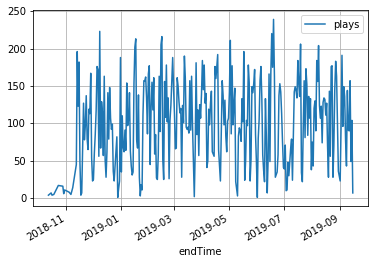

In [72]:
playsPerDays.plot().grid(True)

In [73]:
# And now we do it all again but with moooooooore data

In [74]:
# Read data from files
temp = []
for i in range(0,9):
    df = pd.read_json(f'StreamingHistory{i}.json',date_unit = "ms", convert_axes=True)
    temp.append(df)


In [75]:
data2 = pd.concat(temp)

In [76]:
data2 = data2.drop_duplicates()

In [77]:
actuallyCleaned2 = data2.query(f'msPlayed>{minPlayTime} & msPlayed < {maxPlayTime}')

In [78]:
# Lets build my top 20 v2

In [79]:
top20_artists2 = convertMS(actuallyCleaned2.groupby("artistName").sum().sort_values(by="msPlayed").tail(20))

In [80]:
top20_artists2

,msPlayed,minutesPlayed,hoursPlayed
artistName,,,
Panic! At The Disco,40199840,670.00,11.17
ILLENIUM,40933445,682.22,11.37
Jeremy Zucker,40989685,683.16,11.39
blackbear,41021625,683.69,11.39
ODESZA,41351868,689.20,11.49
Timeflies,43004545,716.74,11.95
Seven Lions,47965517,799.43,13.32
State Champs,49284996,821.42,13.69
AnnenMayKantereit,49376047,822.93,13.72


In [81]:
# What about my top 20 songs?

In [82]:
top20_songs2 = convertMS(actuallyCleaned2.groupby(["trackName", "artistName"]).sum().sort_values(by="msPlayed").tail(20))

In [83]:
top20_songs2

,,msPlayed,minutesPlayed,hoursPlayed
trackName,artistName,,,
Rewrite The Stars - Wideboy's Hands In The Air Remix,James Arthur,11581550,193.03,3.22
The Best Fears of Our Lives,Dylan Owen,11846679,197.44,3.29
Falls (Reprise) (feat. Sasha Sloan),ODESZA,12308955,205.15,3.42
Break Some Ice,Dylan Owen,12500957,208.35,3.47
Silhouettes,FYKE,12542742,209.05,3.48
The Bowery,William Ryan Key,12768755,212.81,3.55
Virtue,William Ryan Key,12890954,214.85,3.58
Clearly,Grace VanderWaal,12917395,215.29,3.59
Make A Promise (feat. Elle Vee),Culture Code,13661319,227.69,3.79


In [84]:
# What about songs/artists just by count? 

In [85]:
top20_plays2 = actuallyCleaned2.groupby(["trackName"]).size().reset_index(name='plays').sort_values(by="plays").tail(20)

In [86]:
top20_plays2

,trackName,plays
2928,Ghosts Revisited (feat. Kiah Victoria),61
530,Aquamarine - Acoustic,63
3177,HURT,63
3521,Hollow,64
2807,Friday Night‬‬‬,65
7618,Sunrise,67
1093,Breathe,68
7098,Silhouettes,74
3702,I Don't Care,75
5782,Numb,78


In [87]:
# Thats funny, cuz there are multiple artists with the same song "Home" - this leads to this data beeing actually wrong :D

In [88]:
top20_plays2 = actuallyCleaned2.groupby(["trackName", "artistName"]).size().reset_index(name='plays').sort_values(by="plays").tail(20)

In [89]:
top20_plays2

,trackName,artistName,plays
1664,Clearly,Grace VanderWaal,53
2760,Face My Fears,Wind Walkers,53
10214,We’ll Always Have Paris,Capstan,54
2712,Everything Gets Old,Dylan Owen,54
1217,Break Some Ice,Dylan Owen,55
2115,"December 17, 2018: Farout",Sleeping At Last,55
9110,The Bowery,William Ryan Key,56
2846,Falls (Reprise) (feat. Sasha Sloan),ODESZA,56
9341,The Same Destination,William Ryan Key,56
4001,High Hopes,Our Last Night,57


In [90]:
top20_artistplays2 = actuallyCleaned2.groupby(["artistName"]).size().reset_index(name='plays').sort_values(by="plays").tail(20)

In [91]:
top20_artistplays2

,artistName,plays
3081,ODESZA,190
4188,This Wild Life,193
3642,Seven Lions,196
4672,blackbear,219
3191,Panic! At The Disco,222
4222,Timeflies,228
1981,Jeremy Zucker,230
279,AnnenMayKantereit,245
3818,State Champs,246
2757,Mayday Parade,263


In [92]:
# How much time did I actually spend listening to music?

In [93]:
totalTimePlayed2 = (actuallyCleaned2["msPlayed"].sum()/1000/60).round(0)

In [94]:
totalTimePlayed2

169741.0

In [95]:
actuallyCleaned2 = convertMS(actuallyCleaned2)

C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
actuallyCleaned2.endTime = pd.to_datetime(actuallyCleaned2.endTime)

C:\Users\Pascal\anaconda3\envs\spotify\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
actuallyCleaned2.endTime = actuallyCleaned2["endTime"].dt.floor('d')

In [98]:
# What day of the year was the most active?

In [99]:
actuallyCleaned2.groupby("endTime").sum().sort_values(by="minutesPlayed")

,msPlayed,minutesPlayed,hoursPlayed
endTime,,,
2018-12-28,62153,1.04,0.02
2019-06-01,124750,2.08,0.03
2019-10-03,147850,2.46,0.04
2019-11-23,158741,2.64,0.04
2020-02-08,240893,4.01,0.07
...,...,...,...
2019-02-15,44141736,735.78,12.24
2019-06-17,45413810,757.09,12.59
2018-12-08,46221949,770.40,12.72


In [100]:
# What was the first/last day that is beeing captured?

In [101]:
actuallyCleaned2.endTime.min(), actuallyCleaned2.endTime.max()

(Timestamp('2018-10-12 00:00:00'), Timestamp('2020-05-17 00:00:00'))

In [102]:
daysWithOutPlays2 = pd.date_range(start = actuallyCleaned2.endTime.min(), end=actuallyCleaned2.endTime.max()).difference(actuallyCleaned2.endTime)

In [103]:
daysWithOutPlays2

DatetimeIndex(['2018-10-13', '2018-10-14', '2018-10-17', '2018-10-19',
               '2018-10-20', '2018-10-21', '2018-10-22', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-31',
               '2018-11-01', '2018-11-02', '2018-11-03', '2018-11-05',
               '2018-11-07', '2018-11-09', '2018-11-10', '2018-11-11',
               '2018-12-25', '2018-12-26', '2019-03-22', '2019-04-13',
               '2019-04-20', '2019-06-22', '2019-07-07', '2019-08-31',
               '2019-09-29', '2019-10-01', '2019-10-04', '2019-10-05',
               '2019-12-22', '2019-12-28', '2020-01-11', '2020-02-03',
               '2020-02-11'],
              dtype='datetime64[ns]', freq=None)

In [104]:
playsPerDays2 = actuallyCleaned2.groupby("endTime").size().reset_index(name="plays")

In [105]:
playsPerDays2.endTime = pd.to_datetime(playsPerDays2.endTime)

In [106]:
playsPerDays2.set_index('endTime', inplace=True)

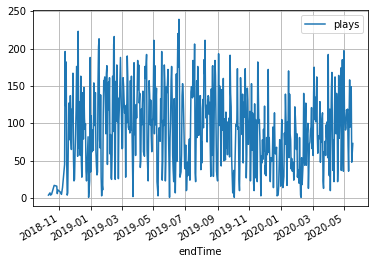

In [107]:
playsPerDays2.plot().grid(True)

In [108]:
top20_artists

,msPlayed,minutesPlayed,hoursPlayed
artistName,,,
Timeflies,25002716,416.71,6.95
Panic! At The Disco,25257000,420.95,7.02
Alex Goot,27150204,452.50,7.54
This Wild Life,27678635,461.31,7.69
Culture Code,27710613,461.84,7.70
ILLENIUM,28476789,474.61,7.91
blackbear,31871541,531.19,8.85
Mayday Parade,33973992,566.23,9.44
Seven Lions,35472445,591.21,9.85


In [109]:
top20_artists2

,msPlayed,minutesPlayed,hoursPlayed
artistName,,,
Panic! At The Disco,40199840,670.00,11.17
ILLENIUM,40933445,682.22,11.37
Jeremy Zucker,40989685,683.16,11.39
blackbear,41021625,683.69,11.39
ODESZA,41351868,689.20,11.49
Timeflies,43004545,716.74,11.95
Seven Lions,47965517,799.43,13.32
State Champs,49284996,821.42,13.69
AnnenMayKantereit,49376047,822.93,13.72


In [110]:
top20_songs

,msPlayed,minutesPlayed,hoursPlayed
trackName,,,
Last Words First,10133032,168.88,2.81
Break Some Ice,10223940,170.40,2.84
Numb,10432818,173.88,2.90
Make A Promise (feat. Elle Vee),10474478,174.57,2.91
Clearly,10681447,178.02,2.97
Breathe,10804925,180.08,3.00
The New American Religion,10830480,180.51,3.01
Virtue,11663992,194.40,3.24
Call You Mine,11924257,198.74,3.31


In [111]:
top20_songs2

,,msPlayed,minutesPlayed,hoursPlayed
trackName,artistName,,,
Rewrite The Stars - Wideboy's Hands In The Air Remix,James Arthur,11581550,193.03,3.22
The Best Fears of Our Lives,Dylan Owen,11846679,197.44,3.29
Falls (Reprise) (feat. Sasha Sloan),ODESZA,12308955,205.15,3.42
Break Some Ice,Dylan Owen,12500957,208.35,3.47
Silhouettes,FYKE,12542742,209.05,3.48
The Bowery,William Ryan Key,12768755,212.81,3.55
Virtue,William Ryan Key,12890954,214.85,3.58
Clearly,Grace VanderWaal,12917395,215.29,3.59
Make A Promise (feat. Elle Vee),Culture Code,13661319,227.69,3.79


In [112]:
top50_songs = convertMS(actuallyCleaned2.groupby(["trackName", "artistName"]).sum().sort_values(by="msPlayed").tail(50))

In [113]:
top50_songs

,,msPlayed,minutesPlayed,hoursPlayed
trackName,artistName,,,
My Head,Anki,9248336,154.14,2.57
GHOST,Witt Lowry,9248826,154.15,2.57
"December 17, 2018: Farout",Sleeping At Last,9522326,158.71,2.65
A Forever Recovery (Acoustic),Capstan,9540738,159.01,2.65
Vultures,William Ryan Key,9577601,159.63,2.66
Promise Me,We Came As Romans,9738101,162.30,2.70
Bau mich auseinander,Fynn Kliemann,9764508,162.74,2.71
Es ist wieder Februar,OK KID,9934605,165.58,2.76
"No More, No Less",William Ryan Key,10022053,167.03,2.78


In [114]:
worst50_songs = convertMS(actuallyCleaned2.groupby(["trackName", "artistName"]).sum().sort_values(by="msPlayed").head(50))

In [115]:
worst50_songs

,,msPlayed,minutesPlayed,hoursPlayed
trackName,artistName,,,
Silence Isn't Golden,FigureItOut,30190,0.50,0.01
The Ethereal Visions,The Guard,30580,0.51,0.01
What If I?,Young Mister,30910,0.52,0.01
Demons,Jacob Lee,30937,0.52,0.01
Marcus Mouya - Stay With Me - Radio Edit,Marcus Mouya,30966,0.52,0.01
"When I Am Older - From ""Frozen 2""/First Listen",Josh Gad,31000,0.52,0.01
"The Next Right Thing - From ""Frozen 2""/First Listen",Kristen Bell,31000,0.52,0.01
Everything I Do,Timeflies,31195,0.52,0.01
Zu Ende träumen - Karaoke Version,Pur,31913,0.53,0.01


In [116]:
songsByPlays = actuallyCleaned2.groupby(["trackName", "artistName"]).size().reset_index(name="plays").sort_values(by="plays")

In [117]:
# Lets try to work on the recommendation "engine"

In [118]:
# Whats the avg. amount of plays?

In [119]:
songsByPlays.mean()

plays    4.540587
dtype: float64

In [120]:
# Looking at the graph, i would define the cut-off at 20

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E4DF8A0C8>]],
      dtype=object)

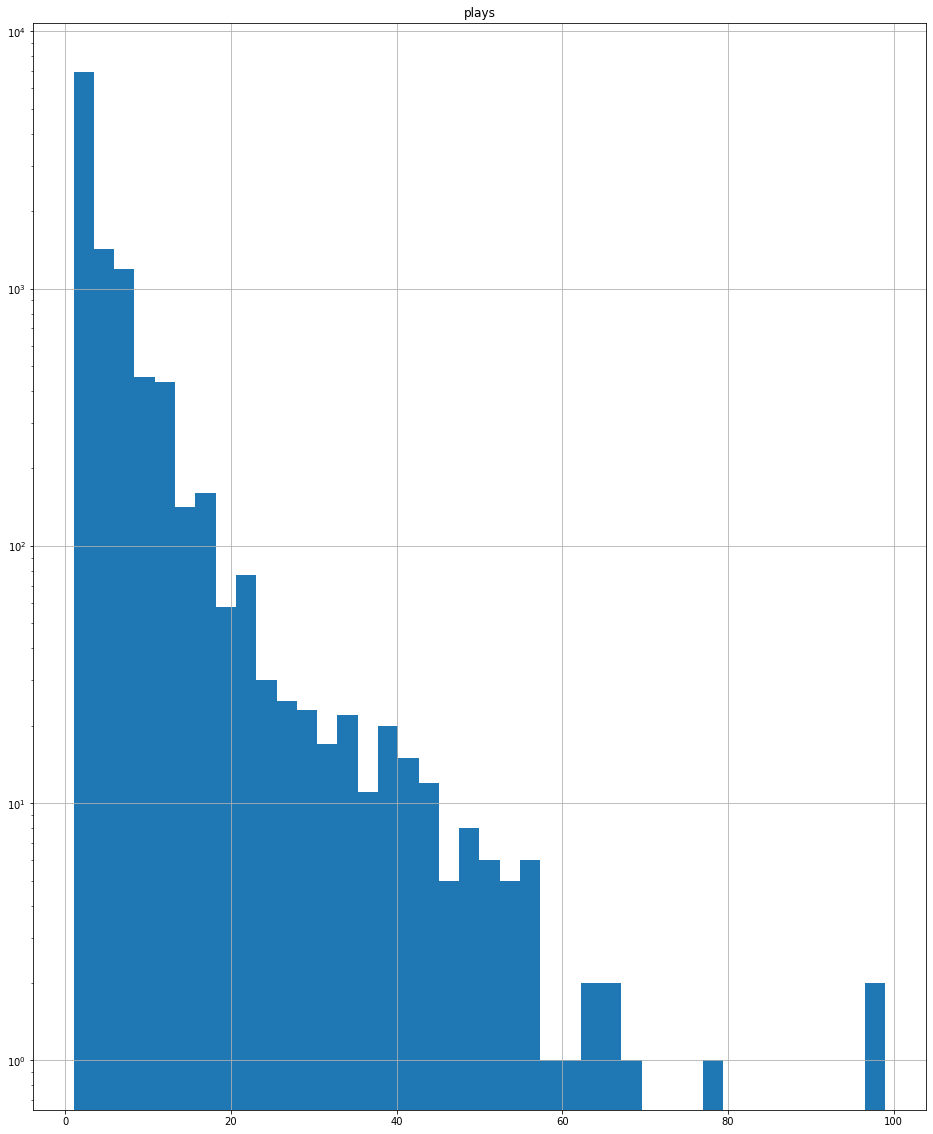

In [121]:
songsByPlays.hist(figsize=(16,20), bins=40, log=True)

In [122]:
# Ideally, we store a "Last played date in our data"

In [123]:
t = actuallyCleaned2.tail(500)

In [124]:
t.query('artistName == "Lil Dicky"')

,endTime,artistName,trackName,msPlayed,minutesPlayed,hoursPlayed
9499,2020-05-13,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9543,2020-05-14,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9563,2020-05-14,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9574,2020-05-14,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9602,2020-05-14,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9696,2020-05-14,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),244339,4.07,0.07
9753,2020-05-15,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),270092,4.50,0.08
83,2020-05-17,Lil Dicky,Molly (feat. Brendon Urie of Panic at the Disco),241476,4.02,0.07


In [125]:
#artistName, songName, plays, lastPlayedDate
#artistName, songName, datePlayed

In [126]:
# Get last value for specifc key

In [127]:
t2 = t.groupby(["trackName", "artistName"])["endTime"].agg('last').reset_index()

In [128]:
lastPlayed = actuallyCleaned2.groupby(["trackName", "artistName"])["endTime"].agg('last').reset_index()

In [129]:
lastPlayed.rename(columns={"endTime":"lastPlayed"}, inplace=True)

In [130]:
lastPlayed.set_index(["trackName", "artistName"], inplace = True)

In [131]:
lastPlayed

,,lastPlayed
trackName,artistName,
"""Y"" (One More Pill)",Corey Kilgannon,2019-05-28
#SELFIE,The Chainsmokers,2020-05-17
& Jay-Z singt uns ein Lied,Thees Uhlmann,2019-12-13
'Till I Collapse,Eminem,2019-11-13
(Fuck A) Silver Lining,Panic! At The Disco,2019-05-01
...,...,...
É Amor - Remix,MC D.O.N.Y,2020-03-16
Übermorgen,Mark Forster,2020-05-01
Überwintern,EMMA6,2020-04-26


In [132]:
recomendations = songsByPlays.set_index(["trackName", "artistName"]).join(lastPlayed)

In [133]:
# Alright, give me some old songs I liked! :)

In [134]:
recomendations.query("lastPlayed < 20200101 & plays > 20")

,,plays,lastPlayed
trackName,artistName,,
Blind Faith,How Great Were the Robins,21,2019-09-24
Chemical Reaction,Secrets,21,2019-11-01
Bleed It Out,Linkin Park,21,2019-11-19
Perfect Strangers,ARTY,21,2019-09-14
Freaking Out - Matoma Remix,A R I Z O N A,21,2019-08-28
If We Have Each Other,Alec Benjamin,21,2019-06-10
Back to Brooklyn,Jared Evan,22,2019-10-24
"Into the Unknown - From ""Frozen 2""",Panic! At The Disco,22,2019-11-18
Highway,Nora Van Elken,22,2019-09-14


In [135]:
# Round 2, how about recommendations based on play time - this might scew the data in favor of longer songs tough

In [136]:
songsByTime = convertMS(actuallyCleaned2.groupby(["trackName", "artistName"]).sum().sort_values(by="msPlayed"))

In [137]:
songsByTime.mean()

msPlayed         916525.441145
minutesPlayed        15.275380
hoursPlayed           0.254589
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E4D759588>,
      dtype=object)

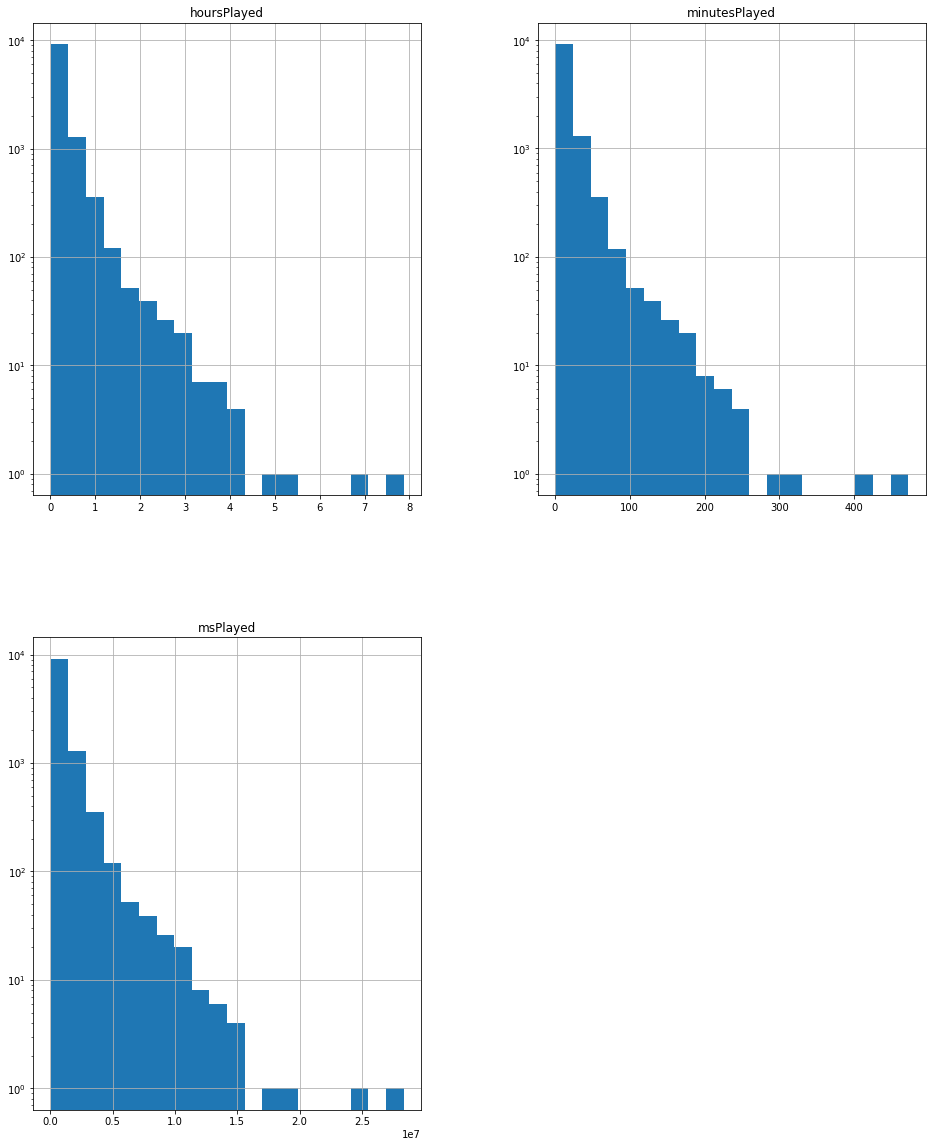

In [138]:
songsByTime.hist(figsize=(16,20), bins=20, log=True)

In [139]:
recos2= songsByTime.join(lastPlayed)

In [140]:
recos2.query("lastPlayed < 20200101 & minutesPlayed > 50").sort_values(by="lastPlayed")

,,msPlayed,minutesPlayed,hoursPlayed,lastPlayed
trackName,artistName,,,,
Swipe Right,Forest Blakk,5833621,97.23,1.62,2018-11-29
Couldn't Be Done,Hazlett,3070766,51.18,0.85,2019-01-07
The Little Things Give You Away,Linkin Park,3118515,51.98,0.87,2019-04-01
Young & Free,Dermot Kennedy,3200645,53.34,0.89,2019-04-22
Schlagschatten,AnnenMayKantereit,3597612,59.96,1.00,2019-05-13
...,...,...,...,...,...
Hollow,Ivan B,7446282,124.10,2.07,2019-12-19
Colors,CrazyEightyEight,8883682,148.06,2.47,2019-12-19
"No More, No Less",William Ryan Key,10022053,167.03,2.78,2019-12-20


In [141]:
recos3 = recos2.join(songsByPlays.set_index(["trackName", "artistName"]))

In [142]:
recos3.query("lastPlayed < 20200101 & minutesPlayed > 50 & plays > 20").sort_values(by="lastPlayed")

,,msPlayed,minutesPlayed,hoursPlayed,lastPlayed,plays
trackName,artistName,,,,,
Vielleicht Vielleicht,AnnenMayKantereit,8954531,149.24,2.49,2019-05-17,45
If We Have Each Other,Alec Benjamin,3811024,63.52,1.06,2019-06-10,21
Home,Cheat Codes,4527548,75.46,1.26,2019-06-19,25
Marie - Dach Session,AnnenMayKantereit,6342882,105.71,1.76,2019-06-27,28
Lost Control,Alan Walker,4817187,80.29,1.34,2019-06-28,22
Empty Space,James Arthur,5084366,84.74,1.41,2019-07-14,24
HURT,Witt Lowry,15340257,255.67,4.26,2019-07-18,63
Freaking Out - Matoma Remix,A R I Z O N A,4685354,78.09,1.30,2019-08-28,21
CRASH,Witt Lowry,5329856,88.83,1.48,2019-09-04,23


In [143]:
# Let's import my starred songs as a list of songs - then let's check when I last played each song

In [144]:
# Time to find some old classics - spotify's random isnt truly random, right?

In [145]:
starred = pd.read_csv('../starred.csv', sep=";")

In [146]:
starredPlaytime = starred.set_index(["trackName", "artistName"]).join(lastPlayed)

In [147]:
starredPlaytime.sort_values(by="lastPlayed")

,,lastPlayed
trackName,artistName,
Love Song,Four Year Strong,2018-12-19
Love Song Requiem,Trading Yesterday,2018-12-24
Change My Name,Trading Yesterday,2019-01-10
Hear Me Now,Hollywood Undead,2019-02-15
Truthseeker,Yoe Mase,2019-02-22
...,...,...
Watercolour - Full Version; Single,Pendulum,NaT
We Don't Need,Hendersin,NaT
Welcome To My Town,Take The Seven,NaT


In [148]:
starredPlaytime.query("lastPlayed == 'NaT'")

,,lastPlayed
trackName,artistName,
"2""Take Me Home (feat. Bebe Rexha)""",Cash Cash,NaT
A Million Kisses (feat. Vivian Fabry),Romance on a Rocketship,NaT
Afraid,Hendersin,NaT
And the Hero Will Drown (10 Year Version),Story Of The Year,NaT
Angel with a shotgun,Nightcore,NaT
Be Alive!,Nightcore,NaT
"Beat to My Melody (aus Sing meinen Song, Vol. 4)",Gentleman,NaT
Beautiful People (Zamli Summer Remix),Benny Benassi,NaT
Bitter,Hendersin,NaT


In [149]:
# Looks like these songs are either not available anymore , or we messed up with the decoding for the names

In [150]:
# Let's check some examples

In [151]:
pd.options.display.max_colwidth = 100

In [152]:
pd.options.display.max_rows = 200

In [153]:
actuallyCleaned.query("artistName == 'Kristen Bell'")

,endTime,artistName,trackName,msPlayed,minutesPlayed,hoursPlayed
3270,2018-12-08,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",188490,3.14,0.05
5537,2018-12-31,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06
5540,2018-12-31,Kristen Bell,"For the First Time in Forever - From ""Frozen""/Soundtrack Version",56833,0.95,0.02
827,2019-02-08,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",125120,2.09,0.03
1911,2019-02-15,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06
4965,2019-03-11,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06
7817,2019-04-01,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06
7882,2019-04-01,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",40685,0.68,0.01
2116,2019-05-01,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06
3635,2019-05-10,Kristen Bell,"Do You Want to Build a Snowman? - From ""Frozen""/Soundtrack Version",206506,3.44,0.06


In [154]:
# Hm - let's get back to that later :D

In [155]:
starredPlaytime.sort_values(by="lastPlayed").head(100)

,,lastPlayed
trackName,artistName,
Love Song,Four Year Strong,2018-12-19
Love Song Requiem,Trading Yesterday,2018-12-24
Change My Name,Trading Yesterday,2019-01-10
Hear Me Now,Hollywood Undead,2019-02-15
Truthseeker,Yoe Mase,2019-02-22
The Coldest Heart,To Be Juliet's Secret,2019-03-11
She Makes Me Go (feat. Sean Paul) - Radio Edit,Arash,2019-03-15
You're on My Mind,Plug In Stereo,2019-03-15
Stereo Hearts (feat. Adam Levine),Gym Class Heroes,2019-03-21


In [156]:
# Actually let's put the amount of plays in there as well

In [157]:
starredByPlays = starred.set_index(["trackName", "artistName"]).join(recomendations)

In [158]:
starredByPlays.sort_values(by="lastPlayed").head(100).sort_values(by="plays")

,,plays,lastPlayed
trackName,artistName,,
Love Song,Four Year Strong,1.0,2018-12-19
Love Song Requiem,Trading Yesterday,1.0,2018-12-24
Change My Name,Trading Yesterday,1.0,2019-01-10
Hear Me Now,Hollywood Undead,1.0,2019-02-15
She Makes Me Go (feat. Sean Paul) - Radio Edit,Arash,1.0,2019-03-15
Snow Ghosts,Yoe Mase,1.0,2019-05-06
I Like It Like That (feat. New Boyz),Hot Chelle Rae,1.0,2019-07-29
Summertime,Dave Days,1.0,2019-04-24
The Longest Road - deadmau5 Remix Edit,Morgan Page,1.0,2019-07-29


In [159]:
starredByPlays.query("artistName == 'State Champs'")

,,plays,lastPlayed
trackName,artistName,,
Elevated,State Champs,38.0,2020-04-23
Elevated (Acoustic Version),State Champs,40.0,2020-05-07
If I'm Lucky,State Champs,11.0,2020-01-13
Secrets,State Champs,41.0,2020-04-23
Stitches,State Champs,43.0,2020-04-23


In [160]:
starredByPlays.sort_values(by="plays", ascending=False).head(150)

,,plays,lastPlayed
trackName,artistName,,
Fingerprints,Dylan Owen,99.0,2020-05-08
Nevers Road,Witt Lowry,99.0,2020-05-17
Zuhause,Fynn Kliemann,79.0,2020-04-21
I Don't Care,Our Last Night,69.0,2020-04-23
Ghosts,Dylan Owen,66.0,2020-04-25
Friday Night‬‬‬,Vigiland,65.0,2020-01-08
Aquamarine - Acoustic,Silverstein,63.0,2020-02-27
Ghosts Revisited (feat. Kiah Victoria),Dylan Owen,61.0,2020-02-27
Rewrite The Stars - Wideboy's Hands In The Air Remix,James Arthur,58.0,2020-03-17


In [161]:
# Actually build playlists out of it - All the removed songs -x